## Classification 
### Dengan User Knowledge Modeling Dataset

##### Oleh : Zalid Qomalita Hijriana
September 14, 2019

Dataset URL : https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling

In [184]:
# SKENARIO TAHAP 1
# 1. Preprocessing
#     - Label Encoding
#     - Pada dataset User Knowledge Modeling, data sudah dipisahkan antara data training dan data testing. 
#       Sehingga, disini tidak dilakukan split data 90:10 (train:test).
# 2. Melakukan holdout validaton dengan split training data menjadi 90:10 (train:validasi)
#     - Melakukan validasi data dengan menggunakan 3 metode klasifikasi yaitu SVM, Neural Network, dan Naive Bayes 
#       dengan variasi parameter berbeda
#     - Pilih model terbaik
# 3. Melakukan 5-fold validation
#     - Melakukan validasi data dengan menggunakan 3 metode klasifikasi yaitu SVM, Neural Network, dan Naive Bayes
#       dengan variasi parameter berbeda
#     - Pilih model terbaik
# 4. Melakukan testing dengan model terbaik

In [185]:
# SKENARIO TAHAP 2
#1. Data Understanding :
#   - Dataset User Knowledge Modelling
#   - Distribusi data (memastikan proporsi masing-masing kelas pada saat split data sama dengan data sebelum di split)
#   - Identifikasi misklasifikasi dengan menganalisis outlier menggunakan boxplot, 
#     noisy data, serta korelasi antar atribut.
#2. Melakukan perubahan dan optimasi parameter.
#3. Tahap perbaikan dan pilih model terbaik
#4. Melakukan testing dengan model terbaik
#5. Analisis hasil testing


In [186]:
import pandas as pd
import numpy as np

#Membaca dataset Training
df =  pd.read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls","Training_Data",index_col = None)
df = df[['STG','SCG','STR','LPR','PEG',' UNS']]


In [187]:
#Membaca dataset Testing
dfTest = pd.read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls","Test_Data",index_col = None)
dfTest = dfTest[['STG','SCG','STR','LPR','PEG',' UNS']]


In [188]:
#jumlah data tiap kelas pada data training keseluruhan
df[' UNS'].value_counts()

Middle      88
Low         83
High        63
very_low    24
Name:  UNS, dtype: int64

### Preprocessing
##### - Label Encoding
Label encoding dilakukan untuk atribut kelas (UNS).
Value : 'very_low'= 1, 'Low'= 2, 'Middle'= 3, 'High'= 4. Label encoding dipilih, karena nilai pada atribut UNS merupakan suatu keterurutan.

In [189]:
#encoding value train
df[' UNS']=df[' UNS'].map({'very_low':1, 'Low':2, 'Middle':3, 'High':4})
#encoding value test
dfTest[' UNS']=dfTest[' UNS'].map({'Very Low':1, 'Low':2, 'Middle':3, 'High':4})

In [190]:
#Cek jumlah baris dan kolom
df.shape

(258, 6)

In [191]:
#Memisahkan data input dan target
#x : data input , y : data target 

x_train = df[['STG','SCG','STR','LPR','PEG']]
y_train = df[[' UNS']]

In [192]:
print('---------Data Training---------')
print('jumlah data training :', len(x_train))
print('Data training berada pada variabel x_train dan y_train')

---------Data Training---------
jumlah data training : 258
Data training berada pada variabel x_train dan y_train


### 1. Holdout
Split data. 90% untuk training , 10% untuk validasi 

(variabel: xho_train, xho_val, yho_train, yho_val)

In [193]:
from sklearn.model_selection import train_test_split
xho_train, xho_val, yho_train, yho_val = train_test_split(x_train,y_train,test_size=0.1,random_state=1, stratify = y_train)
print('jumlah data training :', len(xho_train))
print('jumlah data validasi :', len(xho_val))

jumlah data training : 232
jumlah data validasi : 26


#### - Proses Training 
Menggunakan metode klasifikasi SVM, Neural Network, dan Naive Bayes

In [346]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

c = [1,2,3,4,5]
g = [2,4,6,8,10]

for x in c:
    print('C     = ',x)
    for y in g:
        #SVM------------------------------------------------------
        modelSVM = SVC(kernel='linear',C = x, gamma= y).fit(xho_train,yho_train.values.ravel())
        pred = modelSVM.predict(xho_val)
        accuracyHOSVM = modelSVM.score(xho_val,yho_val)
        print('Gamma = ',y ,'   |akurasi  = ',accuracyHOSVM)
    
        

C     =  1
Gamma =  2    |akurasi  =  0.8076923076923077
Gamma =  4    |akurasi  =  0.8076923076923077
Gamma =  6    |akurasi  =  0.8076923076923077
Gamma =  8    |akurasi  =  0.8076923076923077
Gamma =  10    |akurasi  =  0.8076923076923077
C     =  2
Gamma =  2    |akurasi  =  0.8846153846153846
Gamma =  4    |akurasi  =  0.8846153846153846
Gamma =  6    |akurasi  =  0.8846153846153846
Gamma =  8    |akurasi  =  0.8846153846153846
Gamma =  10    |akurasi  =  0.8846153846153846
C     =  3
Gamma =  2    |akurasi  =  0.9230769230769231
Gamma =  4    |akurasi  =  0.9230769230769231
Gamma =  6    |akurasi  =  0.9230769230769231
Gamma =  8    |akurasi  =  0.9230769230769231
Gamma =  10    |akurasi  =  0.9230769230769231
C     =  4
Gamma =  2    |akurasi  =  0.9615384615384616
Gamma =  4    |akurasi  =  0.9615384615384616
Gamma =  6    |akurasi  =  0.9615384615384616
Gamma =  8    |akurasi  =  0.9615384615384616
Gamma =  10    |akurasi  =  0.9615384615384616
C     =  5
Gamma =  2    |akuras

In [347]:
# Pilih model dengan akurasi terbaik
# model dengan nilai C= 4 atau C= 5, nilai gamma tidak terlalu berpengaruh sehingga dapat dipilih salah satu, misal gamma = 10
mSVM = SVC(kernel='linear',C = 4, gamma= 10).fit(xho_train,yho_train.values.ravel())
pred = modelSVM.predict(xho_val)
accuracyHOSVM = modelSVM.score(xho_val,yho_val)
cm = confusion_matrix(yho_val,pred)
print('Akurasi :', accuracyHOSVM)
print('confusion matrik :')
print(cm)

Akurasi : 0.9615384615384616
confusion matrik :
[[2 1 0 0]
 [0 8 0 0]
 [0 0 9 0]
 [0 0 0 6]]


In [348]:
from sklearn.neural_network import MLPClassifier

#Neural Network -------------------------------------------
hl = [[20,20],[40,40],[60,60],[80,80],[100,100]]
lr = [0.02, 0.05, 0.08, 0.1, 0.2]

for x in hl:
    print('Hidden layer  = ',x)
    for y in lr:
        modelNN = MLPClassifier(max_iter=1000, activation='logistic',random_state=1, hidden_layer_sizes=x, learning_rate_init=y).fit(xho_train,yho_train.values.ravel())
        predNN = modelNN.predict(xho_val)
        akurasiNN = modelNN.score(xho_val,yho_val)
        print('Learning rate = ',y,'   |akurasi       = ',akurasiNN)
        

Hidden layer  =  [20, 20]
Learning rate =  0.02    |akurasi       =  1.0
Learning rate =  0.05    |akurasi       =  1.0
Learning rate =  0.08    |akurasi       =  0.9615384615384616
Learning rate =  0.1    |akurasi       =  0.9615384615384616
Learning rate =  0.2    |akurasi       =  0.9615384615384616
Hidden layer  =  [40, 40]
Learning rate =  0.02    |akurasi       =  0.9615384615384616
Learning rate =  0.05    |akurasi       =  0.9615384615384616
Learning rate =  0.08    |akurasi       =  0.9615384615384616
Learning rate =  0.1    |akurasi       =  1.0
Learning rate =  0.2    |akurasi       =  0.9615384615384616
Hidden layer  =  [60, 60]
Learning rate =  0.02    |akurasi       =  0.9615384615384616
Learning rate =  0.05    |akurasi       =  0.9615384615384616
Learning rate =  0.08    |akurasi       =  0.9230769230769231
Learning rate =  0.1    |akurasi       =  0.34615384615384615
Learning rate =  0.2    |akurasi       =  0.34615384615384615
Hidden layer  =  [80, 80]
Learning rate =

In [349]:
#Pilih Model terbaik Neural Network
#Berdasarkan percobaan diatas, learning rate = 0.02 dan hidden layer =[20,20] menghasilkan rata-rata akurasi tertinggi

mNN = MLPClassifier(max_iter=1000, activation='logistic',random_state=1, hidden_layer_sizes=[20,20], learning_rate_init=0.02).fit(xho_train,yho_train.values.ravel())
predNN = mNN.predict(xho_val)
accuracyHONN = mNN.score(xho_val,yho_val)
print('akurasi Holdout - Neural Network = ',accuracyHONN)
cmNN = confusion_matrix(yho_val,predNN)
print('confusion matrik :')
print(cmNN)

akurasi Holdout - Neural Network =  1.0
confusion matrik :
[[3 0 0 0]
 [0 8 0 0]
 [0 0 9 0]
 [0 0 0 6]]


In [369]:
from sklearn.naive_bayes import GaussianNB

score_nb = []
ep = [1, 1e-2, 1e-3, 1e-4, 1e-5]
for x in ep:
    modelNB = GaussianNB(var_smoothing=x).fit(xho_train,yho_train.values.ravel())
    predNB = modelNB.predict(xho_val)
    akurasiNB = modelNB.score(xho_val,yho_val)
    print('var smoothing  = ',x,'   |akurasi       = ',akurasiNB)
    
    

cmNB = confusion_matrix(yho_val,predNB)
print('akurasi Holdout - Naive Bayes = ',akurasiNB)
print('confusion matrik :')
print(cmNB)

var smoothing  =  1    |akurasi       =  0.6538461538461539
var smoothing  =  0.01    |akurasi       =  0.9230769230769231
var smoothing  =  0.001    |akurasi       =  0.9230769230769231
var smoothing  =  0.0001    |akurasi       =  0.9230769230769231
var smoothing  =  1e-05    |akurasi       =  0.9230769230769231
akurasi Holdout - Naive Bayes =  0.9230769230769231
confusion matrik :
[[3 0 0 0]
 [0 8 0 0]
 [0 2 7 0]
 [0 0 0 6]]


### 2. K-fold
K-FOLD dengan k = 5

In [198]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

#### - Proses Pemisahan Data dan Training 
Data dilatih dengan mengunakan metode klasifikasi SVM, Neural Network, dan Naive Bayes

In [354]:
score_svm = []

#SVM
c = [1,2,3,4,5]
g = [2,4,6,8,10]

for x in c:
    print('C = ',x)
    for y in g:        
        for train_kf,val_kf in kf.split(x_train,y_train):
            #print("TRAIN:", train_kf, "VALIDATION:", val_kf)
            xTrainKf, xValKf = x_train.iloc[train_kf], x_train.iloc[val_kf]
            yTrainKf, yValKf = y_train.iloc[train_kf], y_train.iloc[val_kf]
            modelKfSVM = SVC(kernel='linear',C = x, gamma= y).fit(xTrainKf,yTrainKf.values.ravel())
            score_svm.append(modelKfSVM.score(xValKf,yValKf))
        svmmean = np.mean(score_svm)
        print('gamma = ',y,'    |akurasi=',svmmean)


C =  1
gamma =  2     |akurasi= 0.8491704374057315
gamma =  4     |akurasi= 0.8491704374057315
gamma =  6     |akurasi= 0.8491704374057316
gamma =  8     |akurasi= 0.8491704374057315
gamma =  10     |akurasi= 0.8491704374057315
C =  2
gamma =  2     |akurasi= 0.8562594268476622
gamma =  4     |akurasi= 0.8613229907347554
gamma =  6     |akurasi= 0.8651206636500754
gamma =  8     |akurasi= 0.8680744092508799
gamma =  10     |akurasi= 0.8704374057315234
C =  3
gamma =  2     |akurasi= 0.8744755244755243
gamma =  4     |akurasi= 0.8778406234288586
gamma =  6     |akurasi= 0.8806880148509107
gamma =  8     |akurasi= 0.8831286360698124
gamma =  10     |akurasi= 0.8852438411261941
C =  4
gamma =  2     |akurasi= 0.8878205128205128
gamma =  4     |akurasi= 0.8900940466684412
gamma =  6     |akurasi= 0.8921149656443775
gamma =  8     |akurasi= 0.8939231563070574
gamma =  10     |akurasi= 0.8955505279034692
C =  5
gamma =  2     |akurasi= 0.8970229117287941
gamma =  4     |akurasi= 0.8983614424

In [355]:
#Neural Network
score_nn = []
hl = [[20,20],[40,40],[60,60],[80,80],[100,100]]
lr = [0.02, 0.05, 0.08, 0.1, 0.2]

for x in hl:
    print('Hidden Layer =', x)
    for y in lr:
        for train_kf,val_kf in kf.split(x_train,y_train):
            #print("TRAIN:", train_kf, "VALIDATION:", val_kf)
            xTrainKf, xValKf = x_train.iloc[train_kf], x_train.iloc[val_kf]
            yTrainKf, yValKf = y_train.iloc[train_kf], y_train.iloc[val_kf]
            modelKfNN = MLPClassifier(max_iter=1000, activation='logistic',random_state=1, hidden_layer_sizes=x, learning_rate_init=y).fit(xTrainKf,yTrainKf.values.ravel())
            score_nn.append(modelKfSVM.score(xValKf,yValKf))
        nnmean = np.mean(score_nn)
        print('learning rate = ',y,'    |akurasi=',nnmean)

Hidden Layer = [20, 20]
learning rate =  0.02     |akurasi= 0.934238310708899
learning rate =  0.05     |akurasi= 0.934238310708899
learning rate =  0.08     |akurasi= 0.934238310708899
learning rate =  0.1     |akurasi= 0.934238310708899
learning rate =  0.2     |akurasi= 0.9342383107088988
Hidden Layer = [40, 40]
learning rate =  0.02     |akurasi= 0.9342383107088988
learning rate =  0.05     |akurasi= 0.9342383107088987
learning rate =  0.08     |akurasi= 0.9342383107088988
learning rate =  0.1     |akurasi= 0.9342383107088987
learning rate =  0.2     |akurasi= 0.9342383107088988
Hidden Layer = [60, 60]
learning rate =  0.02     |akurasi= 0.9342383107088988
learning rate =  0.05     |akurasi= 0.934238310708899
learning rate =  0.08     |akurasi= 0.9342383107088991
learning rate =  0.1     |akurasi= 0.934238310708899
learning rate =  0.2     |akurasi= 0.9342383107088991
Hidden Layer = [80, 80]
learning rate =  0.02     |akurasi= 0.934238310708899
learning rate =  0.05     |akurasi= 0

In [367]:
#Naive Bayes
score_nb = []
ep = [1, 1e-2, 1e-3, 1e-4, 1e-5]
for x in ep:
        for train_kf,val_kf in kf.split(x_train,y_train):
            #print("TRAIN:", train_kf, "VALIDATION:", val_kf)
            xTrainKf, xValKf = x_train.iloc[train_kf], x_train.iloc[val_kf]
            yTrainKf, yValKf = y_train.iloc[train_kf], y_train.iloc[val_kf]
            modelKfNN = GaussianNB(var_smoothing=x).fit(xTrainKf,yTrainKf.values.ravel())
            score_nb.append(modelKfSVM.score(xValKf,yValKf))
        nbmean = np.mean(score_nb)
        print('var smoothing  = ',x,'   |akurasi       = ',nbmean)

var smoothing  =  1    |akurasi       =  0.934238310708899
var smoothing  =  0.01    |akurasi       =  0.934238310708899
var smoothing  =  0.001    |akurasi       =  0.934238310708899
var smoothing  =  0.0001    |akurasi       =  0.934238310708899
var smoothing  =  1e-05    |akurasi       =  0.9342383107088988


#### Daftar Akurasi

In [366]:
print('--------------DAFTAR AKURASI-----------------------------------')
print('akurasi Holdout - SVM = ',accuracyHOSVM)
print('akurasi Holdout - Neural Network = ',accuracyHONN)
print('akurasi Holdout - Naive Bayes = ',accuracyHONB)
print('akurasi rata-rata kfold - SVM = ', np.max(svmmean))
print('akurasi rata-rata kfold - Neural Network = ', np.max(nnmean))
print('akurasi rata-rata kfold - Naive Bayes = ', np.max(nbmean))

--------------DAFTAR AKURASI-----------------------------------
akurasi Holdout - SVM =  0.9615384615384616
akurasi Holdout - Neural Network =  1.0
akurasi Holdout - Naive Bayes =  0.9230769230769231
akurasi rata-rata kfold - SVM =  0.9017345399698341
akurasi rata-rata kfold - Neural Network =  0.9342383107088991
akurasi rata-rata kfold - Naive Bayes =  0.9342383107088988


----------------------------------------------------------------
Berdasarkan hasil akurasi data validasi tersebut, maka terpilih model terbaik untuk dataset User Kowledge Modelling yaitu dengen metode pembelajaran Neural Network yang menghasilkan akurasi tertinggi yakni 1.0. Sehingga, model inilah yang nantinya akan digunakan untuk tahap testing data.  

-----------------------------------------------------------------

In [294]:
# Model terbaik untuk Full Train
#Neural Network-------------------------------------------
modelNNFinal = MLPClassifier(learning_rate_init=0.02, max_iter=1000, random_state=1, activation='logistic',hidden_layer_sizes=[20,20]).fit(x_train,y_train.values.ravel())

### Testing
    Menggunakan data testing yang sudah disiapkan pada tahap sebelumnya (variable x_test, y_test)

In [295]:
#Memisahkan data testing kedalam x_test dan y_test

x_test = dfTest[['STG','SCG','STR','LPR','PEG']]
y_test = dfTest[[' UNS']]

In [296]:
print('---------Data Testing---------')
print('jumlah data Testing :', len(x_test))
print('Data testing berada pada variabel x_test dan y_test')

---------Data Testing---------
jumlah data Testing : 145
Data testing berada pada variabel x_test dan y_test


In [297]:
predictNN = modelNNFinal.predict(x_test)
accuracyFinal = modelNNFinal.score(x_test,y_test)

cmNNHO = confusion_matrix(y_test,predictNN)
print('akurasi Holdout - Neural Network = ',accuracyFinal)
print('Confusion Matrik =')
print(cmNNHO)
print('-----------------------------------')
print(classification_report(y_test,predictNN))

akurasi Holdout - Neural Network =  0.9862068965517241
Confusion Matrik =
[[26  0  0  0]
 [ 0 46  0  0]
 [ 0  1 32  1]
 [ 0  0  0 39]]
-----------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       0.98      1.00      0.99        46
           3       1.00      0.94      0.97        34
           4       0.97      1.00      0.99        39

    accuracy                           0.99       145
   macro avg       0.99      0.99      0.99       145
weighted avg       0.99      0.99      0.99       145



## ANALISIS
### 1. Understanding Data

Dataset User Knowledge Modelling merupakan dataset yang digunakan untuk memprediksi level knowledge dari user. 
Prediksi mengenai level knowledge dari user ini menjadi penting karena nantinya dapat digunakan untuk mengcustomisasi sistem 
sehingga bisa disesuaikan dengan kebutuhan user.  Sistem perlu untuk -say the 'right' thing at the 'right' time in the 'right' way.
Sehingga diperlukan representasi tentang user.

Dataset ini terdiri dari 6 atribute (5 continuous input attributes dan 1 discrete target attribute). Untuk data training terdiri dari 258 data. 

In [207]:
print('---------Data Training---------')
print('jumlah data training :', len(x_train))
print('Data training berada pada variabel x_train dan y_train')

---------Data Training---------
jumlah data training : 258
Data training berada pada variabel x_train dan y_train


In [208]:
#Pengecekan data training
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,1
1,0.08,0.08,0.10,0.24,0.90,4
2,0.06,0.06,0.05,0.25,0.33,2
3,0.10,0.10,0.15,0.65,0.30,3
4,0.08,0.08,0.08,0.98,0.24,2


Seperti yang terlihat pada tampilan data ke 1-5 diatas, dapat diketahui bahwa nilai dari masing-masing atribut sudah ternormalisasi dari awal, sehingga tidak perlu dilakukan tahap preprocessing lagi untuk normalisasi data. Masing-masing atribut sudah direpresentasikan kedalam range 0-1, dimana data dalam range ini sangat cocok digunakan untuk masukan metode klasifikasi, yaitu neural network, svm, dan naive bayes.  

Atribut kelas (UNS), pada awalnya masih dalam bentuk ketegorikal (very low, low, middle dan high) yang menyatakan level user : beginner, intermediate, expert, dan advance. Atribut kelas perlu diubah kedalam bentuk digit dengan melakukan proses preprocessing yakni label encoding. Label encoding dipilih karena nilai data merupakan nilai yang terurut.


Untuk selanjutnya, dapat dilihat juga mengenai deskripsi data dari masing-masing atribut, sebagai berikut:

In [209]:
df.describe()

,STG,SCG,STR,LPR,PEG,UNS
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539,2.736434
std,0.210271,0.211962,0.245940,0.248108,0.255211,0.933754
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000,2.000000
50%,0.327000,0.302500,0.490000,0.330000,0.500000,3.000000
75%,0.495000,0.497500,0.690000,0.647500,0.660000,3.000000
max,0.990000,0.900000,0.950000,0.990000,0.930000,4.000000


Secara umum, pada dataset ini, tidak dicurigai terdapat data dengan nilai atribut yang tidak valid. Selanjutnya perlu dilakukan pengecekan apakah terdapat data yang memiliki datatype yang salah dengan memanfaatkan fungsi df.info()

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
STG     258 non-null float64
SCG     258 non-null float64
STR     258 non-null float64
LPR     258 non-null float64
PEG     258 non-null float64
 UNS    258 non-null int64
dtypes: float64(5), int64(1)
memory usage: 12.2 KB


Berdasarkan informasi dari dataset diatas, masing-masing atribut sudah terdefinisi dengan tepat tipe datanya. Missing value juga tidak terdapat pada dataset ini (berdasarkan deskripsi awal pada UCI dataset).

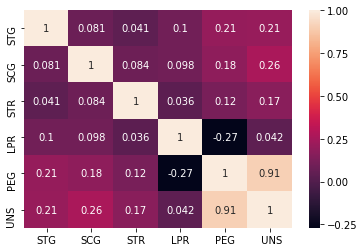

In [211]:
#correlation untuk data training
import seaborn as sns
cor = df.corr()
sns.heatmap(cor,annot=True)

Correlation menyatakan keterhubungan antara dua variabel. Jika dilihat dari tabel korelasi diatas, antar atribut memiliki korelasi yang kecil. Sedangkan untuk variabel PEG dan UNS memiliki korelasi yang kuat. Hal ini menunjukkan bahwa variabel PEG memiliki pengaruh yang besar terhadap kelas klasifikasi.

#### Analisis outlier
Outliers adalah data yang menyimpang terlalu jauh dari data yang lainnya dalam suatu rangkaian data. Outlier sering membuat hasil klasifikasi menjadi bias. Untuk kasus dalam dataset ini, terdapat juga beberapa outlier pada  atribut STG. Namun, karena data ini merepresentasikan sebuah nilai dan mewakili subjek dari penelitian, maka outlier ini tetap digunakan walaupun nantinya kemungkinan nilai-nilai ini yang akan menyebabkan akurasi menurun karena adanya kesalahan klasifikasi. Untuk itu diharapkan algoritma klasifikasi yang digunakan dapat dengan handal menangani masalah outlier ini.

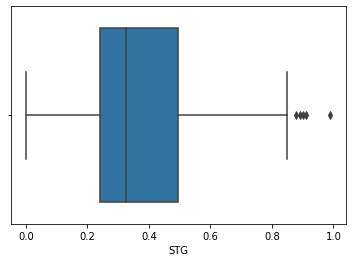

In [212]:
sns.boxplot(x=df['STG'])

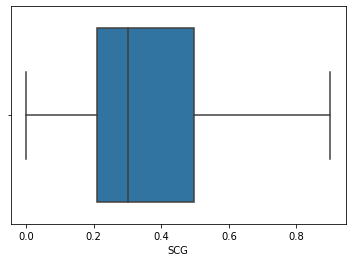

In [213]:
sns.boxplot(x=df['SCG'])

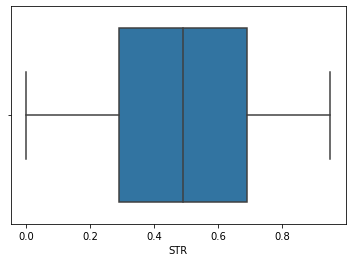

In [214]:
sns.boxplot(x=df['STR'])

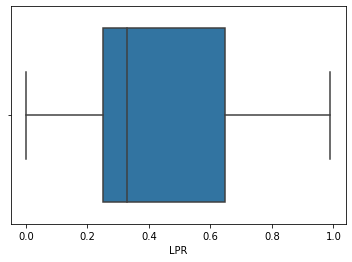

In [215]:
sns.boxplot(x=df['LPR'])

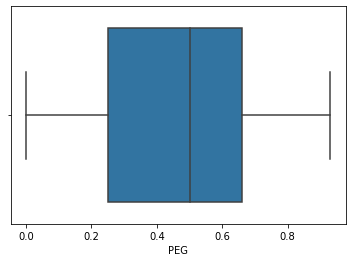

In [216]:
sns.boxplot(x=df['PEG'])

Terakhir, sebelum memasuki proses training dan klasifikasi, data perlu dipastikan distribusinya. Untuk data training dan testing, karena data sudah dipisahkan sejak awal, maka tidak bisa dilakukan perubahan apapun. Sedangkan untuk pemisahan antara data training dan data validasi (holdout), perlu dipastikan bahwa proporsi data untuk masing-masing kelas sudah sama antara sebelum dilakukan pemisahan dengan setelah dilakukan pemisahan. Hal ini ditujukan untuk peningkatan performansi training, yang diharapkan juga dapat meningkatkan nilai akurasi data. Pada kasus ini, pada proses split data, dilakukan pengesetan parameter stratify = target 

### 2. Optimasi Parameter
Pada pengerjaan tahap 1, saat metode klasifikasi masih menggunakan parameter default, akurasi yang didapatkan mencapai diatas 0.7 untuk setiap metode yang digunakan (SVM, Neural Network dan Naive Bayes). Kemudian, pada saat mencoba beberapa parameter diubah, akurasi meningkat cukup pesat hingga diatas 0.8, bahkan untuk neural network hingga diatas 0.9. Oleh karena itu, dapat diprediksi bahwa perubahan parameter classifier sangat berpengaruh secara signifikan terhadap peningkatan akurasi. Sehingga perlu dilakukan eksperiment untuk mendapatkan kombinasi parameter sehingga diperoleh akurasi yang optimal.

#### Skenario :
1. Untuk metode klasifikasi SVM, parameter yang akan diobservasi adalah parameter gamma dan nilai C. Untuk kernel,  dipilih kernel linear, sedangkan decision_function_set nya adalah 'one vs one' yang selalu digunakan untuk strategi multiclass.  
    Gamma = {2,4,6,8,10}, C = {1,2,3,4,5}
2. Untuk metode klasifikasi Neural Network, parameter yang akan diobervasi adalah parameter learning rate dan jumlah hidden layer. Sedangkan untuk parameter lain seperti fungsi aktivasi, telah ditentukan yaitu fungsi logistic.
    learning rate = {0.02 0.05 0.08 0.1 0.2}, hidden layer = {[20 20], [40 40], [60 60], [80 80], [100 100]}
3. Untuk metode Naive Bayes, yang akan diubah adalah parameter var_smoothing = {1, 1e-2, 1e-3, 1e-4, 1e-5}

#### Hasil :

Note : Hasil experiment sudah tertera pada print code diatas.
Berdasarkan hasil experiment optimasi terhadap kombinasi parameter, dihasilkan model terbaik yaitu Neural Network dengan parameter hidden layer = [20,20] dan learning rate = 0.02. Sehingga diperoleh akurasi tertinggi yaitu 1.0 untuk data validasi.

Model terbaik tersebut, selanjutnya digunakan untuk melakukan prediksi pada data testing. Hasil prediksi pada data testing didapatkan hasil sebagai berikut:


In [360]:
print('akurasi Testing= ',accuracyFinal)
print('Confusion Matrik =')
print(cmNNHO)
print('-----------------------------------')
print(classification_report(y_test,predictNN))

akurasi Testing=  0.9862068965517241
Confusion Matrik =
[[26  0  0  0]
 [ 0 46  0  0]
 [ 0  1 32  1]
 [ 0  0  0 39]]
-----------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       0.98      1.00      0.99        46
           3       1.00      0.94      0.97        34
           4       0.97      1.00      0.99        39

    accuracy                           0.99       145
   macro avg       0.99      0.99      0.99       145
weighted avg       0.99      0.99      0.99       145



## Kesimpulan

Pada tugas ini, diberikan dataset dari UCI untuk dilakukan proses klasifikasi dengan menerapkan cara pemilihan model klasifikasi terbaik dengan 2 teknik validasi yaitu Holdout dan Kfold. Data yang telah dipilih dan di proses menghasilkan model terbaik yaitu Neural Network yang dihasilkan dari validasi Holdout dengan akurasi pada test data sebesar 0.986. Hasil akurasi yang tinggi ini dapat dipengaruhi oleh beberapa faktor, seperti:
1. Dataset tidak mengandung banyak noise, atau noise sudah diatasi
2. Penerapan preprocessing yang tepat.
3. Sebaran data pada data training merata
4. Kombinasi parameter yang tepat pada metode klasifikasi

Akurasi yang didapatkan disini sudah lebih tinggi dibandingkan dengan paper yang menjadi acuan yaitu dari  H. T. Kahraman, Sagiroglu, S., Colak, I., dengan judul Developing Intuitive Knowledge Classifier and Modeling of Users', 
Knowledge Based Systems, vol. 37, pp. 283-295, 2013, yang memiliki akurasi sebesar 0.975.  